# What Would be included...
- # 📞 Telecom Customer Churn Prediction

This project predicts whether a telecom customer will **churn (leave the company)** or **stay**, using machine learning models such as Logistic Regression and Random Forest.  
The goal is to help telecom companies **reduce customer loss** by identifying customers likely to churn.

---

## 📊 Dataset Overview

The dataset contains various information about telecom customers, including demographics, account details, and subscription types.

| Column Name | Description |
|--------------|-------------|
| `customerID` | Unique ID assigned to each customer |
| `Gender` | Gender of the customer (Male/Female) |
| `SeniorCitizen` | Indicates if the customer is a senior citizen (1 = Yes, 0 = No) |
| `Partner` | Whether the customer has a partner (Yes/No) |
| `Dependents` | Whether the customer has dependents (Yes/No) |
| `Tenure` | Number of months the customer has stayed with the company |
| `PhoneService` | Whether the customer has a phone service (Yes/No) |
| `MultipleLines` | Whether the customer has multiple lines (Yes/No/No phone service) |
| `InternetService` | Type of internet service (DSL, Fiber optic, No) |
| `OnlineSecurity` | Whether the customer has online security (Yes/No/No internet service) |
| `DeviceProtection` | Whether the customer has device protection (Yes/No/No internet service) |
| `TechSupport` | Whether the customer has tech support (Yes/No/No internet service) |
| `StreamingTV` | Whether the customer has streaming TV service (Yes/No/No internet service) |
| `StreamingMovies` | Whether the customer has streaming movies (Yes/No/No internet service) |
| `Contract` | Type of contract (Month-to-month, One year, Two year) |
| `PaperlessBilling` | Whether billing is paperless (Yes/No) |
| `PaymentMethod` | Method of payment (e.g., Electronic check, Credit card, etc.) |
| `MonthlyCharges` | Amount charged per month |
| `TotalCharges` | Total amount charged to the customer |
| `Churn` | Target variable: whether the customer churned (Yes/No) |

---

## 🎯 Objective

Predict whether a customer will churn based on their account and service details.

---

## 👨‍🎓 Author

| `Name` | **Ali Husnain**|
|--------------|-------------|
| `Roll No` | **SU92-BSAIM-F24-024**|




In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier   # ✅ <-- Add this import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [161]:
df = pd.read_csv('TelecomCustomerChurn.csv')
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [163]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [164]:
df.isnull()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
df.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- ## We are Clearly See there is no null values

In [166]:
df.duplicated().sum()

np.int64(0)

In [167]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

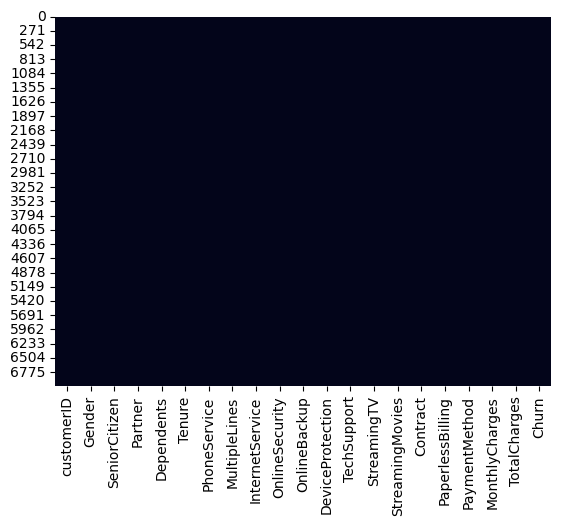

In [168]:
sns.heatmap(df.isnull(), cbar=False)

<Axes: xlabel='Churn', ylabel='count'>

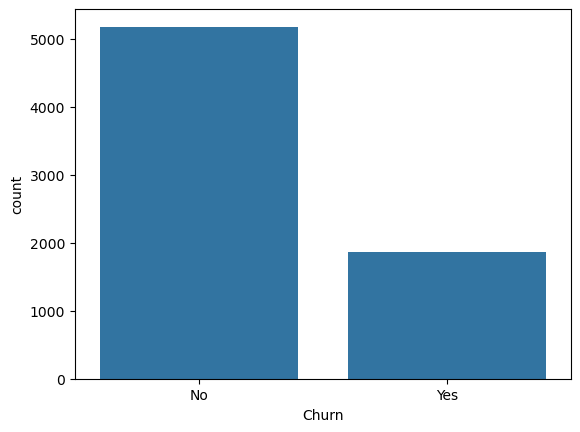

In [169]:
df['Churn'].value_counts(normalize=True)
sns.countplot(x='Churn', data=df)


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

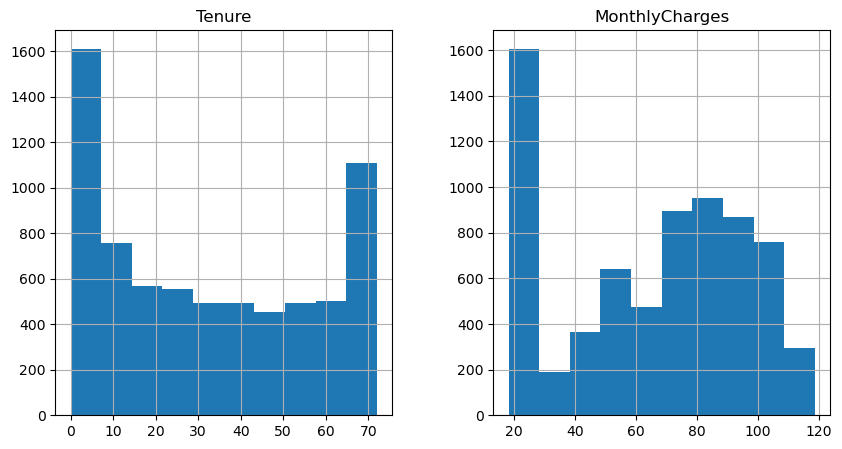

In [170]:
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(figsize=(10, 5))


In [171]:
df.drop("customerID", axis=1, inplace=True)

In [172]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

C:\Users\alihu\AppData\Local\Temp\ipykernel_17376\3639554342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)


In [173]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [174]:
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: >

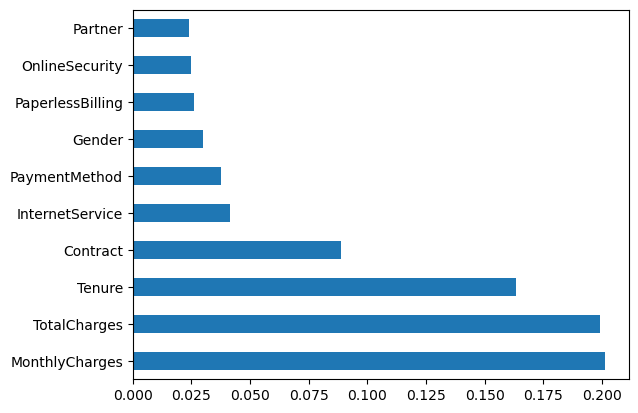

In [175]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')


In [176]:
X_train.dtypes


Gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
Tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [177]:
feature_names = X.columns.tolist()

In [178]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [180]:
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🧾 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.791292001893043
📊 Confusion Matrix:
 [[1401  138]
 [ 303  271]]
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [182]:

import pickle
model_data = {
    "model": model,
    "scaler": scaler,
    "feature_names": feature_names
}

with open("model.pkl", "wb") as file:
    pickle.dump(model_data, file)

print("✅ Model file saved successfully with feature names!")


✅ Model file saved successfully with feature names!
